Step 1: IMPORTING LIBRARIES

In [44]:
#Importing required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [45]:
#Importing Dataset
from google.colab import files
uploaded=files.upload()

Saving Daily Household Transactions.csv to Daily Household Transactions (1).csv


In [46]:
#Reading the DataSet
df=pd.read_csv('Daily Household Transactions.csv')
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


STEP 2: DATA CLEANING

In [47]:
#checking for null values
print(df.isnull().sum())

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64


In [48]:
#filling the null values
df['Subcategory'].fillna('Unknown', inplace=True)
df['Note'].fillna('No Note', inplace=True)

<ipython-input-48-3acf5303121e>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-48-3acf5303121e>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [51]:
#Final check

df.dropna(subset=['Date','Month'], inplace=True)
print(df.isnull().sum())

Date              0
Mode              0
Category          0
Subcategory       0
Note              0
Amount            0
Income/Expense    0
Currency          0
Month             0
dtype: int64


In [50]:
#converting date column to datetime format
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Month']=df['Date'].dt.to_period('M')

<ipython-input-50-e2a0375c966c>:2: UserWarning:

Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

In [52]:
df_expense=df[df['Income/Expense']=='Expense']
df_Income=df[df['Income/Expense']=='Income']

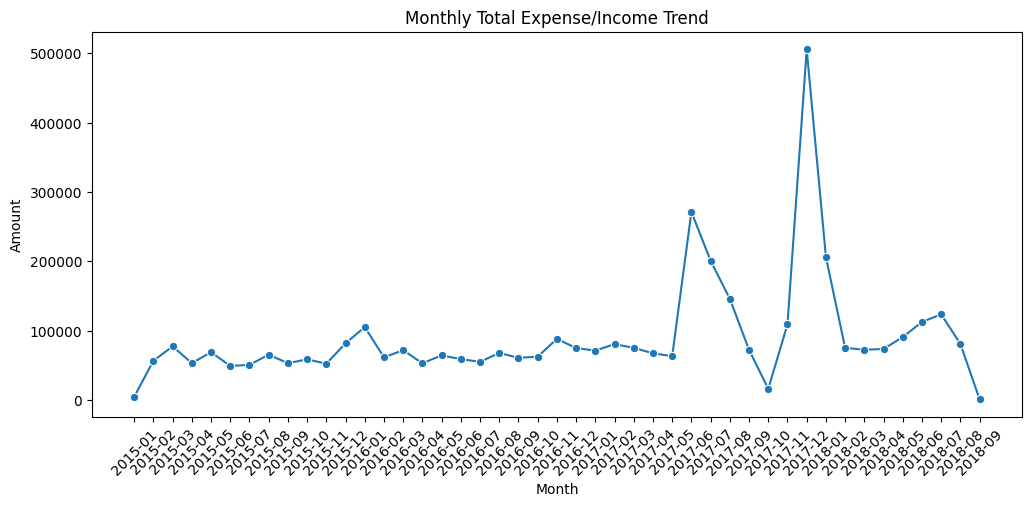

In [53]:
plt.figure(figsize=(12, 5))
df_grouped = df.groupby('Month')['Amount'].sum().reset_index()
df_grouped['Month']=df_grouped['Month'].astype(str)
sns.lineplot(data=df_grouped, x='Month', y='Amount', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Total Expense/Income Trend")
plt.show()

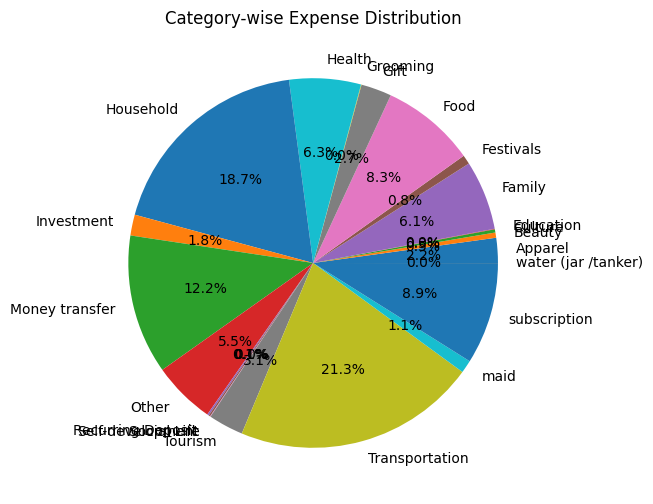

In [54]:
#Category-Wise Expense Distribution
plt.figure(figsize=(8, 6))
df_expense.groupby('Category')['Amount'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Category-wise Expense Distribution")
plt.ylabel('')
plt.show()

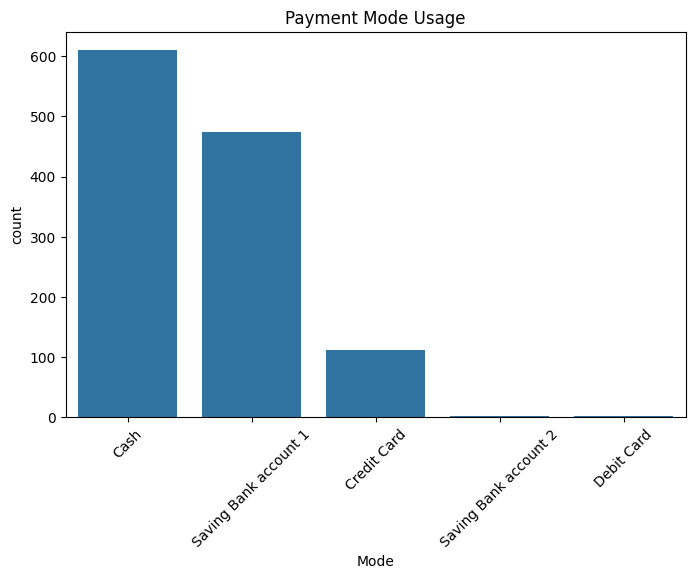

In [55]:
#Payment Mode Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_expense, x='Mode', order=df_expense['Mode'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Payment Mode Usage")
plt.show()

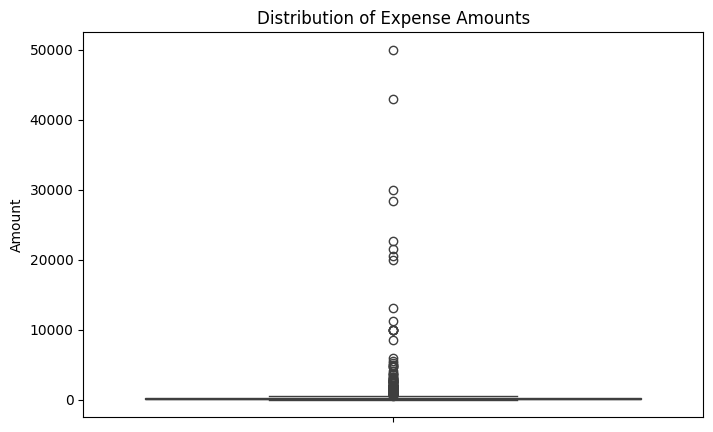

In [56]:
#Box Plot for Expense Amounts
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_expense, y='Amount')
plt.title("Distribution of Expense Amounts")
plt.show()

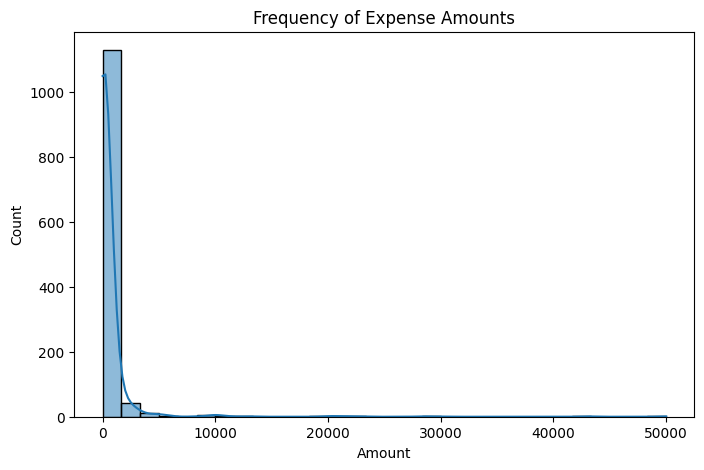

In [57]:
#Histogram of Expense Amounts
plt.figure(figsize=(8, 5))
sns.histplot(df_expense['Amount'], bins=30, kde=True)
plt.title("Frequency of Expense Amounts")
plt.show()

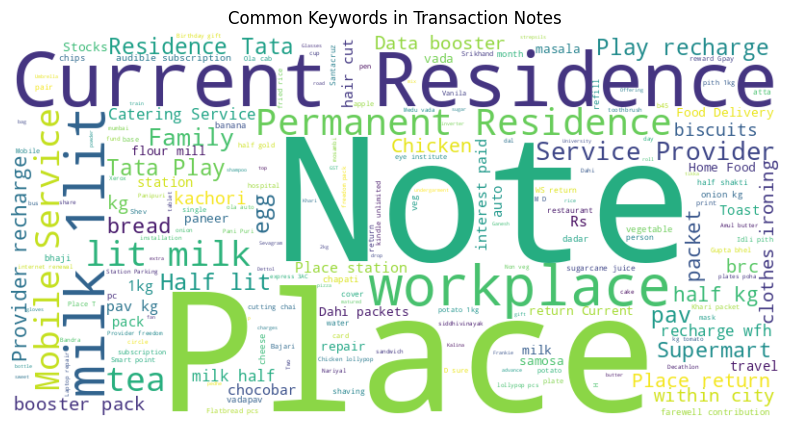

In [58]:
#Word Cloud from Notes
text = ' '.join(df['Note'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Keywords in Transaction Notes")
plt.show()

STEP 4: COORELATION ANALYSIS

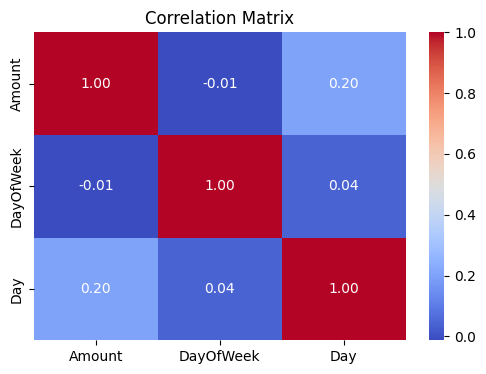

In [59]:
# Correlation Matrix
df_corr = df[['Amount']].copy()
df_corr['DayOfWeek'] = df['Date'].dt.dayofweek
df_corr['Day'] = df['Date'].dt.day
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [60]:
#Treemap for Category-Subcategory Expenses
import plotly.express as px
fig = px.treemap(df_expense, path=['Category', 'Subcategory'], values='Amount', title='Expense Breakdown by Category and Subcategory')
fig.show()

<ipython-input-61-82378d38ed51>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



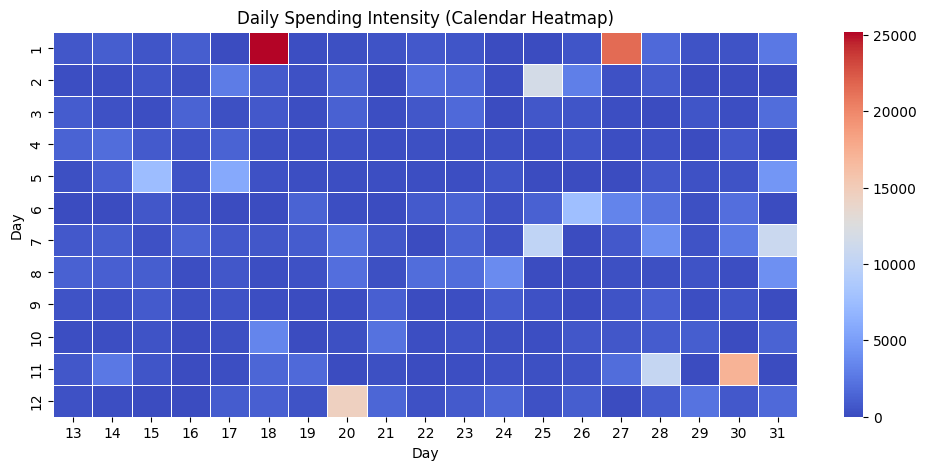

In [61]:
#Calendar Heatmap (Daily Spending Intensity)

#Red shades = High spending (up to 25,000+).
#Blue shades = Low spending.
#White/light blue = Moderate spending.
#Dark blue = Little to no spending

df_expense['Day'] = df_expense['Date'].dt.date
daily_expense = df_expense.groupby('Day')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.heatmap(daily_expense.pivot_table(index=daily_expense['Day'].apply(lambda x: x.month), columns=daily_expense['Day'].apply(lambda x: x.day), values='Amount').fillna(0), cmap='coolwarm', linewidths=0.5)
plt.title("Daily Spending Intensity (Calendar Heatmap)")
plt.show()

In [ ]:
#Thankyou